In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected = True)

In [3]:
df = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Data Visualization

### Histogram

In [8]:
plt.style.use('fivethirtyeight')

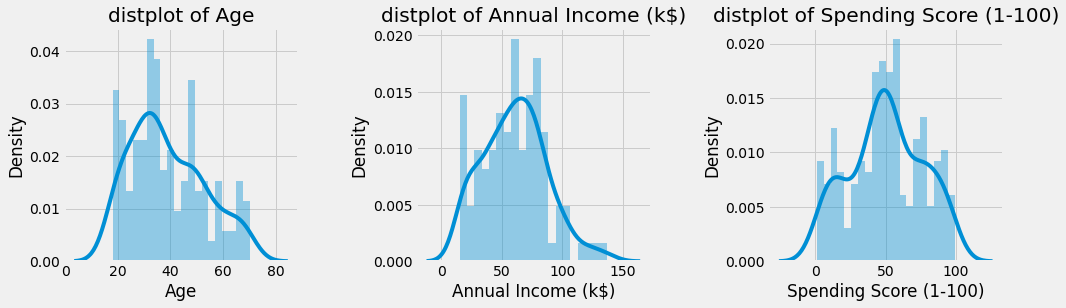

In [9]:
n = 0
plt.figure(1, figsize = (15,4))
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n += 1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(df[x], bins = 20)
    plt.title('distplot of {}'.format(x))

### Count plot of Gender

<AxesSubplot:xlabel='count', ylabel='Gender'>

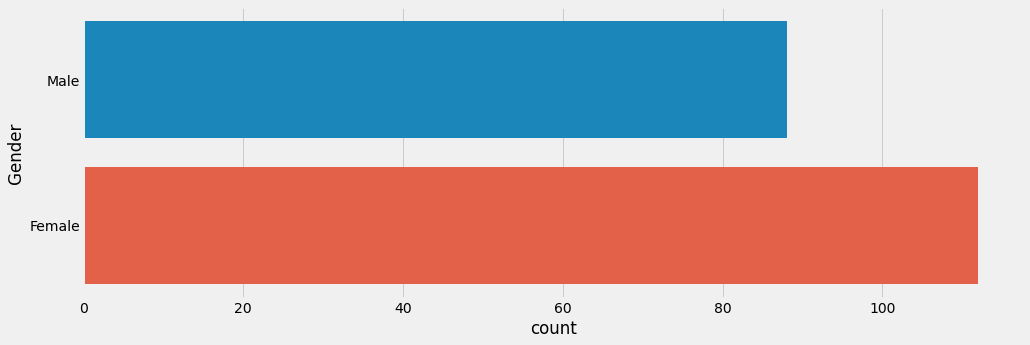

In [10]:
plt.figure(figsize = (15,5))
sns.countplot(y = 'Gender', data = df)

### Age, Annual Income, Spending Score relation

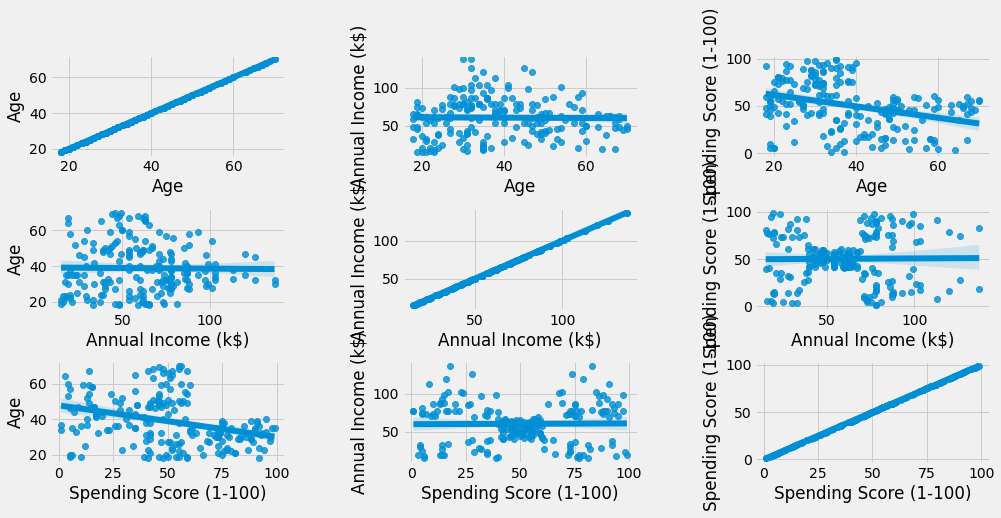

In [11]:
plt.figure(figsize = (15,7))
n = 0
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    for y in ['Age','Annual Income (k$)','Spending Score (1-100)']:
        n+=1
        plt.subplot(3,3,n)
        plt.subplots_adjust(hspace = 0.5,wspace = 0.5)
        sns.regplot(x = x, y = y, data = df)

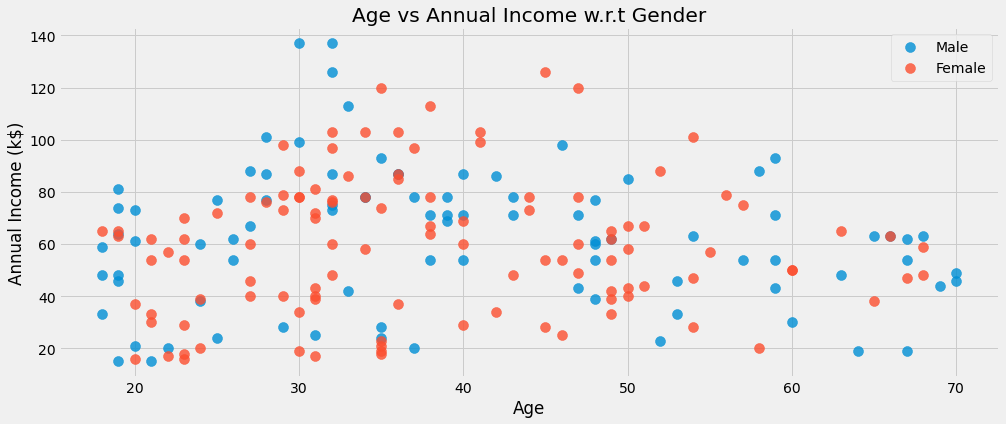

In [12]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , 
                data = df[df['Gender']== gender] ,s = 100 , alpha = 0.8 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

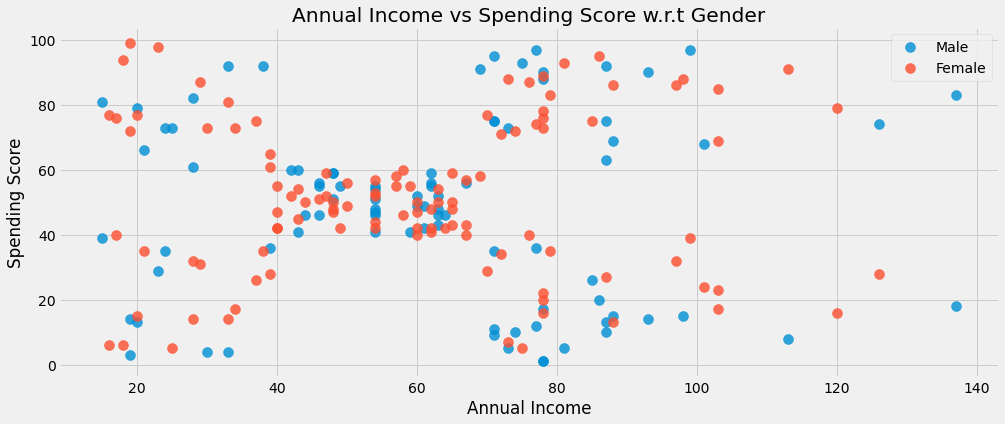

In [13]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)' , y = 'Spending Score (1-100)' , 
                data = df[df['Gender']== gender] ,s = 100 , alpha = 0.8 , label = gender)
plt.xlabel('Annual Income'), plt.ylabel('Spending Score') 
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

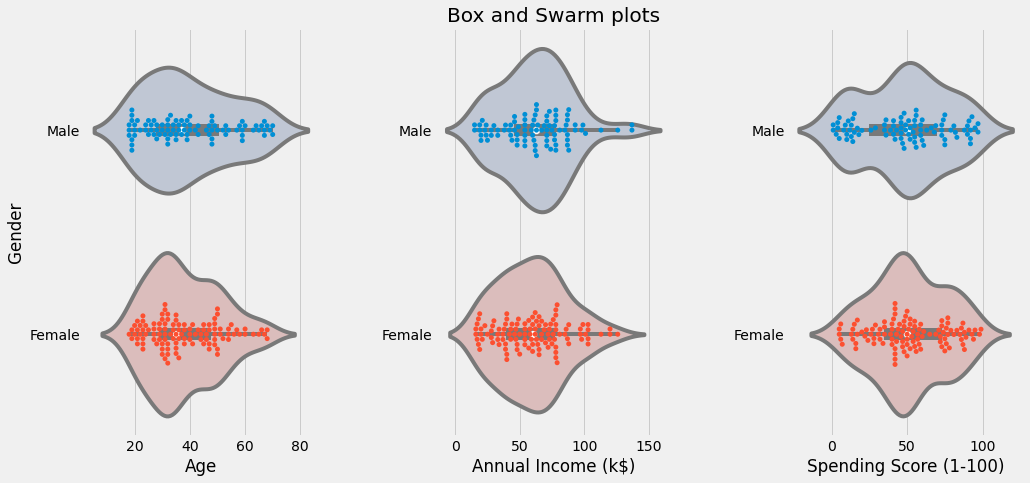

In [14]:
plt.figure(figsize = (15,7))
n = 0
for cols in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.violinplot(x = cols, y = 'Gender', data = df, palette = 'vlag')
    sns.swarmplot(x = cols, y = 'Gender', data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Box and Swarm plots' if n==2 else '')

## Clustering using K-means

### Segmentation using Age and Spending Score

In [15]:
x1 = df[['Age','Spending Score (1-100)']].iloc[:,:].values
inertia = []

for n in range(1,11):
    alg = (KMeans(n_clusters = n, init = 'k-means++', n_init = 10, max_iter = 300,
                 tol = 0.0001, random_state = 9, algorithm = 'elkan'))
    alg.fit(x1)
    inertia.append(alg.inertia_)

Text(0, 0.5, 'inertia')

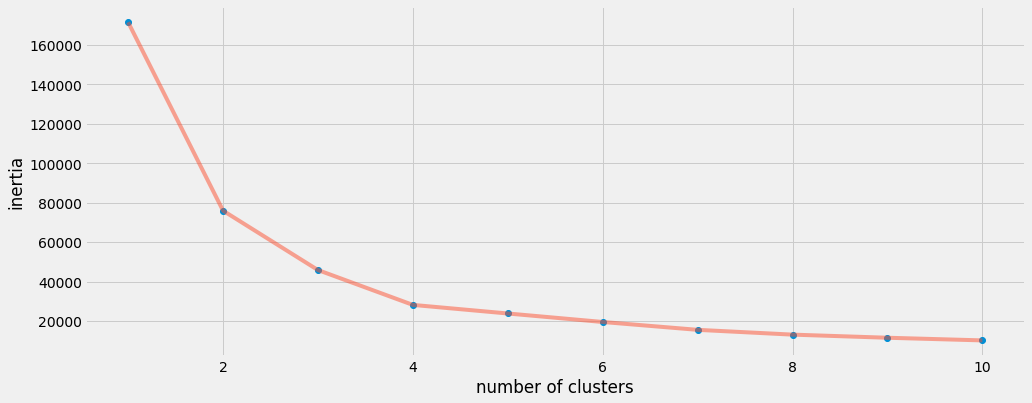

In [16]:
plt.figure(figsize = (15,6))
plt.plot(np.arange(1,11), inertia , 'o')
plt.plot(np.arange(1,11), inertia , '-', alpha = 0.5)
plt.xlabel('number of clusters')
plt.ylabel('inertia')

In [17]:
alg = (KMeans(n_clusters = 4, init = 'k-means++', n_init = 10, max_iter = 300,
             tol = 0.0001, random_state = 9, algorithm = 'elkan'))
alg.fit(x1)
labels1 = alg.labels_
centroids1 = alg.cluster_centers_

In [18]:
h = 0.02
xi,xa = x1[:,0].min()-1, x1[:,0].max()+1
yi,ya = x1[:,1].min()-1, x1[:,1].max()+1

xx,yy = np.meshgrid(np.arange(xi,xa,h), np.arange(yi,ya,h))

Z = alg.predict(np.c_[xx.ravel(), yy.ravel()])

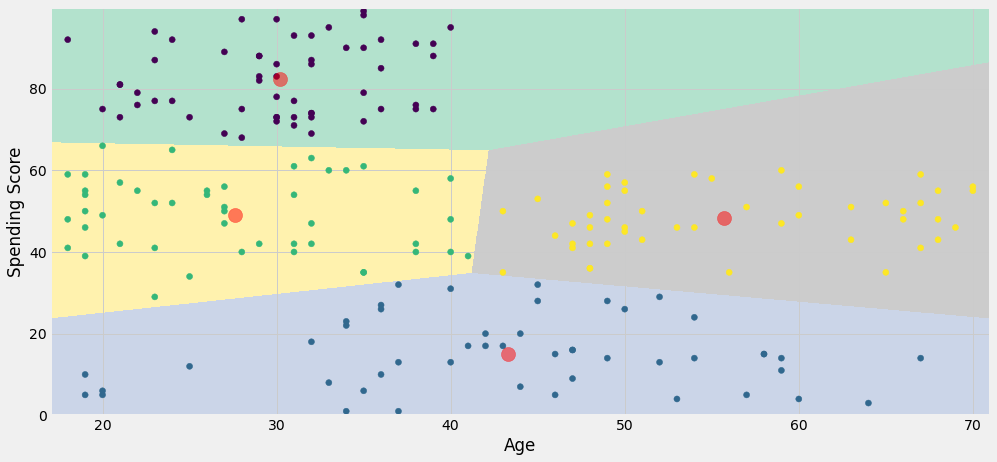

In [19]:
plt.figure(figsize = (15,7))
plt.clf()

Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation = 'nearest', extent = (xx.min(), xx.max(), yy.min(), yy.max()),
          cmap = plt.cm.Pastel2, aspect = 'auto', origin = 'lower')

plt.scatter(x = 'Age', y = 'Spending Score (1-100)', data = df, c = labels1)
plt.scatter(x = centroids1[:,0], y = centroids1[:,1], s = 200, c = 'red', alpha = 0.5)
plt.ylabel('Spending Score'), plt.xlabel('Age');

### Segmentation using Annual Income and Spending Score

In [20]:
x2 = df[['Annual Income (k$)','Spending Score (1-100)']].iloc[:,:].values
inertia = []

for n in range(1,11):
    alg = (KMeans(n_clusters = n, init = 'k-means++', n_init = 10, max_iter = 300,
                 tol = 0.0001, random_state = 9, algorithm = 'elkan'))
    alg.fit(x2)
    inertia.append(alg.inertia_)

Text(0, 0.5, 'inertia')

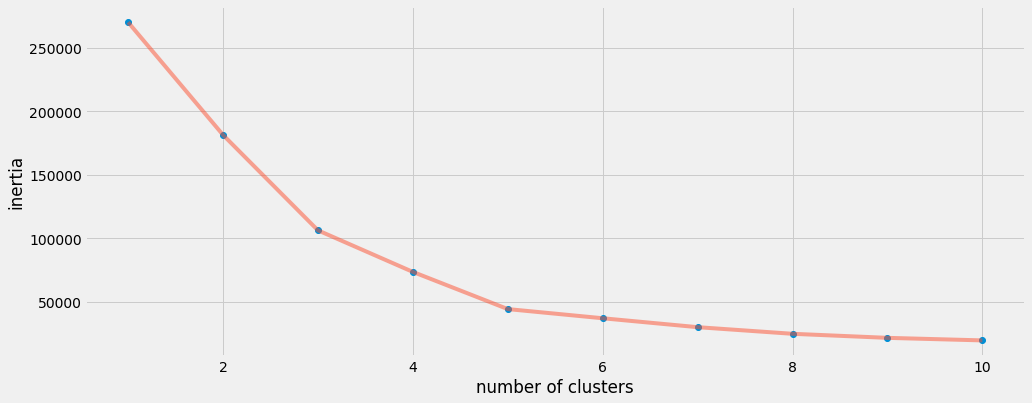

In [21]:
plt.figure(figsize = (15,6))
plt.plot(np.arange(1,11), inertia , 'o')
plt.plot(np.arange(1,11), inertia , '-', alpha = 0.5)
plt.xlabel('number of clusters')
plt.ylabel('inertia')

In [22]:
alg = (KMeans(n_clusters = 5, init = 'k-means++', n_init = 10, max_iter = 300,
             tol = 0.0001, random_state = 9, algorithm = 'elkan'))
alg.fit(x2)
labels2 = alg.labels_
centroids2 = alg.cluster_centers_

In [23]:
h = 0.02
xi,xa = x2[:,0].min()-1, x2[:,0].max()+1
yi,ya = x2[:,1].min()-1, x2[:,1].max()+1

xx,yy = np.meshgrid(np.arange(xi,xa,h), np.arange(yi,ya,h))

Z2 = alg.predict(np.c_[xx.ravel(), yy.ravel()])

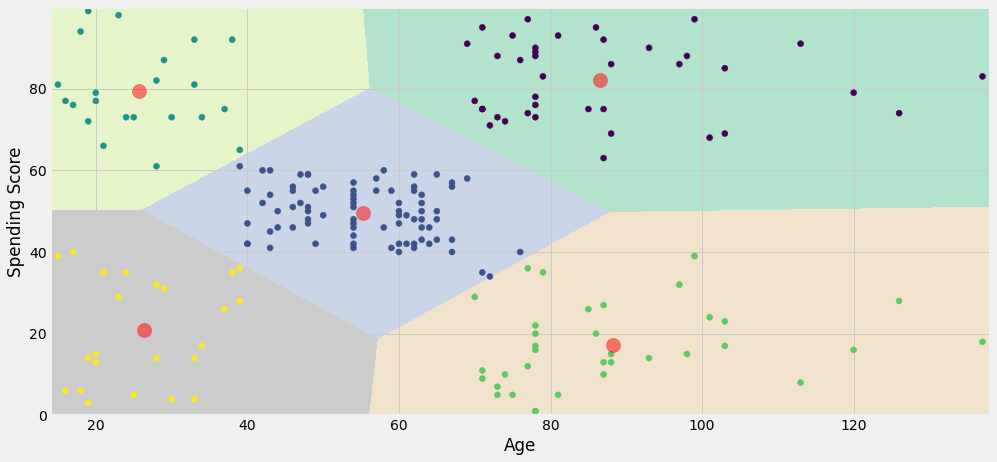

In [24]:
plt.figure(figsize = (15,7))
plt.clf()

Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2, interpolation = 'nearest', extent = (xx.min(), xx.max(), yy.min(), yy.max()),
          cmap = plt.cm.Pastel2, aspect = 'auto', origin = 'lower')

plt.scatter(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df, c = labels2)
plt.scatter(x = centroids2[:,0], y = centroids2[:,1], s = 200, c = 'red', alpha = 0.5)
plt.ylabel('Spending Score'), plt.xlabel('Age');

### Segmentation using Age, Annual Income and Spending Score

In [25]:
X3 = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

(Text(0.5, 0, 'Number of Clusters'), Text(0, 0.5, 'Inertia'))

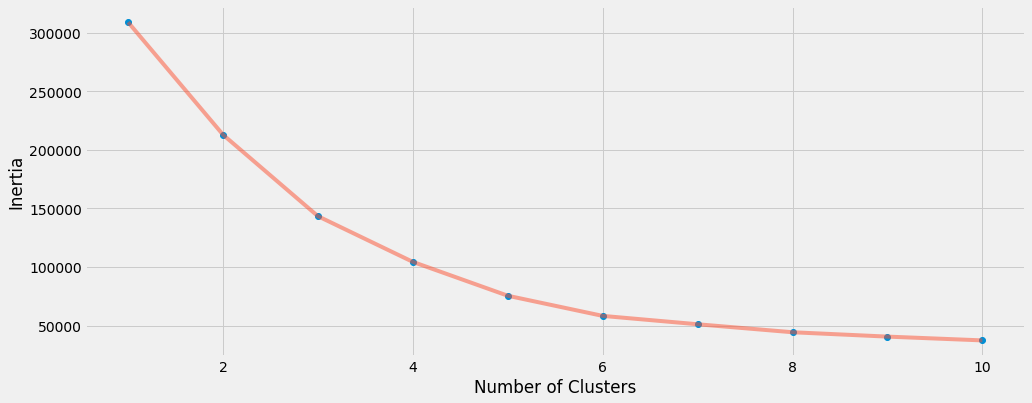

In [26]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')

In [27]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [28]:
df['label3'] =  labels3
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df['label3'], 
        size= 5,
        line=dict(
            color= df['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)